In [2]:
%pip install tweepy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 94 kB 1.2 MB/s eta 0:00:01
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.1-py3-none-any.whl (151 kB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
     |████████████████████████████████| 161 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 781 kB/s  eta 0:00:01
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import re 
import tweepy 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tweepy import OAuthHandler 
from textblob import TextBlob
import os

[nltk_data] Downloading package punkt to /Users/cole/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/cole/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import tweepy
import os
APIK = os.environ.get('APIK')
APISK = os.environ.get('APISK')
ACCTO = os.environ.get('ACCTO')
ACCTOS = os.environ.get('ACCTOS')
auth = tweepy.OAuthHandler(APIK, APISK) #Set up the app keys
auth.set_access_token(ACCTO,
                      ACCTOS) #set up your user tokens
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


TypeError: Consumer key must be string or bytes, not NoneType

In [4]:
def connect():
  # Replace the xxxxx with your twitter api keys
  consumer_key = 'APIK'
  consumer_secret = 'APISK'
  access_token = 'ACCTO'
  access_token_secret = 'ACCTOS'

  try:
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api
  except:
    print("Error")
    exit(1)

### Tweepy API User Info

In [5]:
api = tweepy.API(auth)

In [6]:
me = api.verify_credentials()

In [7]:
me.name

'Cole'

In [8]:
print(f'I have {me.followers_count} follower.')
print(f'I am following {me.friends_count} users.')

I have 21 follower.
I am following 164 users.


### Rate Limits

In [9]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '2777419660-hIblVunw1TwIbGqiNE9HWcogMx3OaxTtRe0YxJN'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1656087748},
   '/lists/:id/tweets&GET': {'limit': 900,
    'remaining': 900,
    'reset': 1656087748},
   '/lists/:id/followers&GET': {'limit': 180,
    'remaining': 180,
    'reset': 1656087748},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1656087748},
   '/lists/:id&DELETE': {'limit': 300, 'remaining': 300, 'reset': 1656087748},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1656087748},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1656087748},
   '/lists/:id&GET': {'limit': 75, 'remaining': 75, 'reset': 1656087748},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1656087748},
   '/lists/:id&PUT': {'limit': 300, 'remaining': 300, 'reset': 1656087748},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1656087

In [12]:
print(api.rate_limit_status()['resources']['followers']['/followers/ids'])

{'limit': 15, 'remaining': 15, 'reset': 1656087833}


In [13]:
print(api.rate_limit_status()['resources']['users']['/users/lookup'])

{'limit': 900, 'remaining': 900, 'reset': 1656087842}


In [14]:
cbhami02=api.get_user(screen_name='cbhami02')

### Search Tweets by Topic

In [15]:
def print_tweets(tweets):
    """For each Tweepy Status object in tweets, display the 
    user's screen_name and tweet text. If the language is not
    English, translate the text with TextBlob."""
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
    
        if 'en' in tweet.lang:
            print(f'{tweet.text}\n')
        elif 'und' not in tweet.lang:  # translate to English first
            print(f'\n  ORIGINAL: {tweet.text}')
            try:
                print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')
            except:
                print('Unable to translate tweet')

In [16]:
tweets = api.search(q='Roe', count=100)

In [17]:
print_tweets(tweets) 

jahnicee: RT @laurenarankin: The Supreme Court just overturned Roe v. Wade and Planned Parenthood v. Casey. This is devastating, an absolute national…

psanville4: RT @LakotaMan1: Setup abortion clinics on Indian reservations. Whereas, sovereign nations, Supreme Court decisions, like overturning Roe V…

Ralynnschmalynn: RT @MrGordian: Roe. Miranda. Gun control. Church and State. All dismantled in a single week. The single worst week for civil rights and lib…

Colleen_lee10: RT @Public_Citizen: BREAKING: THE SUPREME COURT OVERTURNS ROE V. WADE!

Don't tell us about "freedom" when this is a direct assault on wome…

_gabbbyyyy: RT @PPFA: BREAKING: The Supreme Court just overturned Roe v. Wade, ending our constitutional right to abortion. We know you may be feeling…

Lmpera: RT @sewpheeyuh: roe v wade being struck down is simultaneously a prison sentence and a death sentence for black ppl — we’ll be at the mercy…

penguintruth: RT @SenSanders: Overturning Roe v. Wade and denying women the 

In [18]:
tweets = api.search(q='Roe :)', count=3) #Only "positive sentiment tweets involving Roe"

In [19]:
print_tweets(tweets)

notemilyanymore: I hope everyone who supports overturning Roe v Wade gets a very bad unwanted pregnancy :)

bridgetttb: of course all the 80 year old politicians overturned Roe v Wade, (despite what the majority of Americans want) they… https://t.co/SrehgHzg8w



### Trends Available

In [20]:
trends_available = api.trends_available()

In [21]:
len(trends_available)

467

In [22]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [23]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [24]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [25]:
world_trends = world_trends_comp[0]['trends'] # The 'trends' key is tied to the info about the actual trending topics

In [26]:
world_trends[4]

{'name': 'SCOTUS',
 'url': 'http://twitter.com/search?q=SCOTUS',
 'promoted_content': None,
 'query': 'SCOTUS',
 'tweet_volume': 580896}

In [27]:
world_trends_baseline = [t for t in world_trends if t['tweet_volume']]
world_trends_high_volume = [t for t in world_trends if (t['tweet_volume']) and(t['tweet_volume']>100000)]
print(f'Total world trends: {len(world_trends)}') #Remember that the cap of returned trends is 50!
print(f'Total world trends >10k volume: {len(world_trends_baseline)}')
print(f'Total world trends >100k volume: {len(world_trends_high_volume)}')


Total world trends: 50
Total world trends >10k volume: 41
Total world trends >100k volume: 12


In [28]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

### World_Trends

In [29]:
from operator import itemgetter 

In [30]:
World_trends_w_volume = [t for t in world_trends if (t['tweet_volume'])]
print(f'Total World trends >15k volume: {len(World_trends_w_volume)}')


Total World trends >15k volume: 41


In [31]:
world_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) #sort world trends by descending volume

In [32]:
for trend in world_trends_baseline[:10]: #Display the top 5 topics by volume
    print(trend['name'])

Supreme Court
America
SCOTUS
Constitution
Abortions
Senate
Loving
The United States
Clarence Thomas
SAFE FLIGHT TENLEE


In [33]:
WW_topics = {}  # dictionary to store trend names and volumes for topics in the world


In [35]:
for trend in world_trends_baseline:
    WW_topics[trend['name']] = trend['tweet_volume']

In [36]:
print(WW_topics)

{'Supreme Court': 1568009, 'America': 720986, 'SCOTUS': 580896, 'Constitution': 312549, 'Abortions': 259962, 'Senate': 245931, 'Loving': 204830, 'The United States': 199435, 'Clarence Thomas': 187662, 'SAFE FLIGHT TENLEE': 182764, 'DO SOMETHING': 155409, '#RoeVsWade': 121526, 'Lawrence': 90859, 'Alito': 90283, '#かぐや様': 82559, 'Kavanaugh': 71850, 'Hillary': 68512, 'Obergefell': 65811, 'Corte Suprema': 62889, 'Griswold': 62654, 'Casey': 57719, 'Mitch McConnell': 56255, 'Roberts': 53654, 'トイストーリー4': 52838, 'Barrett': 49571, 'Nancy Pelosi': 42250, 'Planned Parenthood': 38372, 'Gorsuch': 36339, 'Susan Collins': 34989, 'ウッディ': 34458, 'Land of the Free': 34238, 'Missouri': 34071, 'Manchin': 33730, '#Dobbs': 26064, "Handmaid's Tale": 25604, 'Praise God': 24654, 'États-Unis': 22966, '#roeoverturned': 21733, 'LIFE WINS': 17267, '#AbortionRightsAreHumanRights': 13897, 'Gilead': 13868}


In [37]:
import pandas as pd

WWdf = pd.DataFrame(WW_topics, index = [0]) 

<AxesSubplot:title={'center':'Twitter Trends in the World'}, xlabel='Trends', ylabel='Count'>

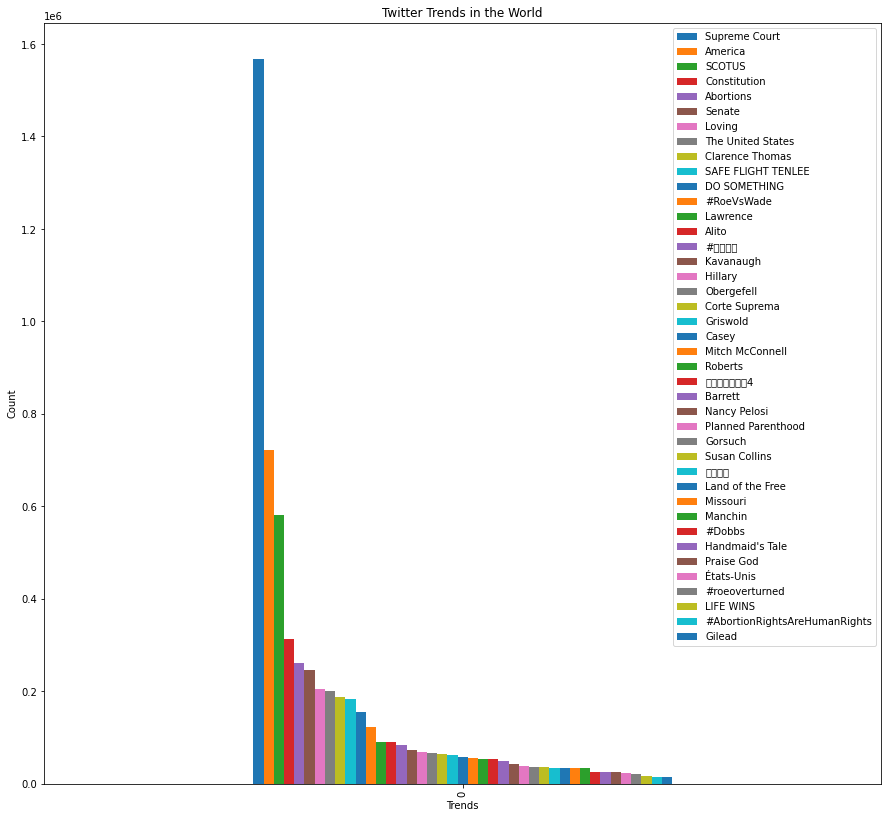

In [40]:
#Plot Descending
WWdf.plot(kind="bar",
 figsize=(15, 14),
  xlabel="Trends",
   ylabel="Count",
    title="Twitter Trends in the World")

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#mask = np.array(Image.open('Texas.jpg'))

wordcloud_WW = WordCloud(width=1800, height=900,
    prefer_horizontal=0.5, min_font_size=6, colormap='prism', 
    background_color='white')

In [49]:
wordcloud_WW = wordcloud_WW.fit_words(WW_topics)

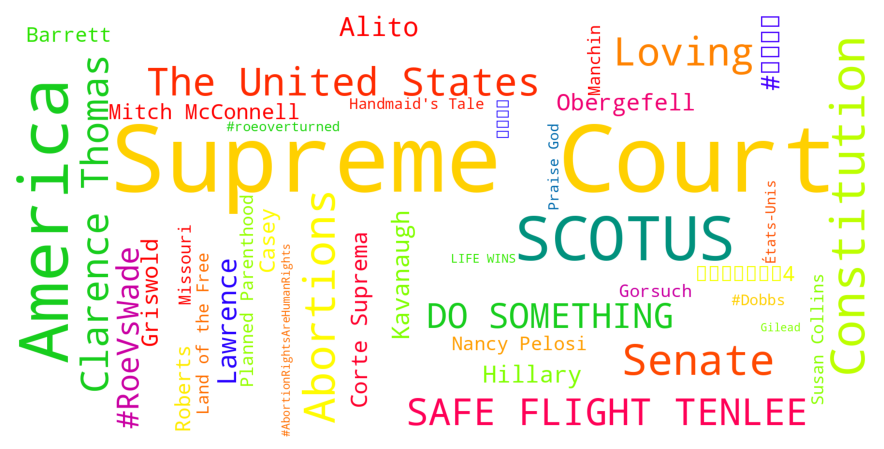

In [50]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#mask = np.array(Image.open('Texas.jpg'))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_WW)
plt.axis("off")
plt.show()

## Tweet Listener

### Load Packages

In [1]:
from tweetlistener import TweetListener
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
import preprocessor as p
from prepsubjecttweets import prepsubject

### Test Tweet Listener and Clean Tweet

In [ ]:
tweet_text = 'RT #NASA A sample retweet with a URL https://nasa.gov'

In [ ]:
p.clean(tweet_text)

'#NASA A sample retweet with a URL'

### Tweet Listener - Load Trends

In [6]:
tweetlistraw1,tweetlistprep1 = prepsubject('Roe',150)

### Number 1 Tweet Topic

In [7]:
tweetlistraw1

["RT @MichelleObama: My thoughts on the Supreme Court's decision to overturn Roe v. Wade. https://t.co/9ALSbapHDY",
 'RT @tribelaw: Breyer/Sotomayor/Kagan: "With sorrow—for this Court, but more, for the many millions of American women who have today lost a…',
 'RT @LambdaLegal: Today, the Supreme Court issued a ruling that overturned Roe v. Wade and Planned Parenthood v. Casey, undermining 50+ year…',
 'RT @KenPaxtonTX: SCOTUS just overruled Roe &amp; Casey, ending one of the most morally &amp; legally corrupt eras in US history. Praise the Lord.…',
 'RT @gabby_frost: do NOT donate to politicians asking for money because of roe v wade being overturned right now. donate it to abortion fund…',
 "RT @ABC: 26 states are expected to ban or severely restrict abortion rights in wake of the Supreme Court's ruling overturning Roe v. Wade.…",
 'RT @texastwt: Overturning Roe V. Wade isn’t going to stop people from getting abortions, it’ll stop them from getting SAFE abortions.',
 'RT @fox5dc: #UP

In [8]:
tweetlistprep1

[": My thoughts on the Supreme Court's decision to overturn Roe v. Wade.",
 ': Breyer/Sotomayor/Kagan: "With sorrowfor this Court, but more, for the many millions of American women who have today lost a',
 ': Today, the Supreme Court issued a ruling that overturned Roe v. Wade and Planned Parenthood v. Casey, undermining + year',
 ': SCOTUS just overruled Roe &amp; Casey, ending one of the most morally &amp; legally corrupt eras in US history. Praise the Lord.',
 ': do NOT donate to politicians asking for money because of roe v wade being overturned right now. donate it to abortion fund',
 ": states are expected to ban or severely restrict abortion rights in wake of the Supreme Court's ruling overturning Roe v. Wade.",
 ': Overturning Roe V. Wade isnt going to stop people from getting abortions, itll stop them from getting SAFE abortions.',
 ': : Police have released a large inflatable under the demonstrator who scaled the Frederick Douglass Bridge in DC after th',
 ': if any of you ag

In [12]:
import pandas as pd
tweetlist = pd.DataFrame(tweetlistprep1)

In [13]:
tweetlist.head()

,0
0,: My thoughts on the Supreme Court's decision ...
1,": Breyer/Sotomayor/Kagan: ""With sorrowfor this..."
2,": Today, the Supreme Court issued a ruling tha..."
3,": SCOTUS just overruled Roe &amp; Casey, endin..."
4,: do NOT donate to politicians asking for mone...


## Stream

### Load Packages

In [14]:
from tweepy.streaming import Stream
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

### Sentiment Listener Topic 1

In [15]:
run sentimentlistener.py "#Roe" 100

- Alacranita: Do not forget as #Roe is overturned, Buck v. Bell still stands. In 1927, Carrie Buck, a poor white woman, was first…

+ elbow_ellen: This #Roe decision will help us win the #2022midterms. The only way we get this handled is by voting.…

- WestWingReport: President calls SCOTUS decision on #Roe a "tragic error," an "extremist" decision..."so extreme that women and girl…

- badtechnician: Angry off-script Biden is the Biden that's needed now #Roe

  LichardRewis: Me saving my race all like: #roe #scotus

  DaveDaRave287: #FunFact #Roe never had an #Abortion and is #ProLife #RoeVWade #RoeVsWade

  zainyh: "This Fall, #Roe is on the ballot" @POTUS

- ComeOnMan4Real: #Roe v. Wade is overturned. What does that mean for abortion in Texas? | Texas was one of 13 states to already pass…

  BryanAlexander: "This fall #Roe is on the ballot."

  annmarietimmins: Here’s what #Roe means for NH - beyond the 24-week ban. #NHPolitics

  jeffbrady1985: Praying for women, babies, and all who

KeyboardInterrupt: 

## Geocoding

In [17]:
import os
from geopy import OpenMapQuest

In [18]:
geo = OpenMapQuest(api_key=os.environ['GeoCK'])
locations = ['222 Eastern Pkwy, Louisville, KY 40208',
             '440 N Whittington Pkwy, Louisville, KY 40222']
geo_locations = []
for loc in locations:
    geo_locations.append(geo.geocode(loc))

In [19]:
geo_locations

[Location(Duthie Center for Engineering, 222, Eastern Parkway, Louisville, Jefferson County, Kentucky, 40208, United States of America, (38.21264035, -85.7608605714874, 0.0)),
 Location(Burhans Hall, 440, North Whittington Parkway, Hurstbourne, Jefferson County, Kentucky, 40222, United States of America, (38.25334785, -85.5843224594185, 0.0))]

In [20]:
from tweetutilities import get_tweepy_API

In [21]:
api = get_tweepy_API()

In [22]:
tweets = [] 
counts = {'total_tweets': 0, 'locations': 0}


### Location Listener

In [23]:
from locationlistener import LocationListener

In [27]:
location_listener = LocationListener(api, counts_dict=counts, 
    tweets_list=tweets, topic='Roe', limit=150)

In [28]:
stream = tweepy.Stream(auth=api.auth, listener=location_listener)

In [29]:
stream.filter(track=['Roe'], languages=['en'], is_async=False)

bimb0nicplague: so pissed i mistyped roe

JonERing0: 2009 the Obama/Biden administration had a Super Majority. Obama decided that codifying Roe V Wade was not on his li… https://t.co/NSkFGfwS6q

Ballblom: @nytimes Not a safe haven for unborn Americans. Praise God Roe v. Wade is overturned.

PrideVMC: Supreme Court overturns Roe v. Wade
As President Biden said, it's a sad day for America. 
Love your loved ones and… https://t.co/2qGnX9XtTD

tomselliott: Everything Biden just said is false:

— Women’s lives not at risk
— Congress can’t codify Roe v. Wade
— “I’ve studi… https://t.co/BgztkcmRyQ

medicinehelp: Roe v Wade: US Supreme Court ends constitutional right to abortion https://t.co/qQel7LbaYq

deeriemee: I just saw a tweet about the overturning of Roe v Wade. To all those effected in the USA my heart goes out to you,… https://t.co/oX1L0u3Y8q

BCarlsonfl: @GraveInformer @borderless_dev @Portelle_CEO @ninaturner If you’re upset that roe was overturned, don’t be upset. Y… https://t.co/wN

In [30]:
counts['total_tweets'] #total tweets examined

242

In [31]:
counts['locations'] #tweets kept (should match # for LocationListener limit UNLESS there was a timeout)

150

In [32]:
print(f'{counts["locations"] / counts["total_tweets"]:.1%}') # % tweets that had locations

62.0%


In [33]:
from tweetutilities import get_geocodes

In [34]:
tweet_locations_fail = get_geocodes(tweets)

Getting coordinates for tweet locations...
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
Done geocoding


In [35]:
tweet_locations_fail

33

In [36]:
print(f'{tweet_locations_fail / counts["locations"]:.1%} of the locations could not be deciphered.')

22.0% of the locations could not be deciphered.


### Location Listener DataFrame

In [37]:
import pandas as pd

In [38]:
dft2 = pd.DataFrame(tweets)
dft = pd.DataFrame(tweets)

In [39]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  150 non-null    object 
 1   text         150 non-null    object 
 2   location     150 non-null    object 
 3   latitude     117 non-null    float64
 4   longitude    117 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.0+ KB


In [40]:
dft.head()

,screen_name,text,location,latitude,longitude
0,its_lindz,Where’s Will Smith?!,The streets,26.264384,81.507755
1,bimb0nicplague,so pissed i mistyped roe,sitting in the shower,NaN,NaN
2,JonERing0,2009 the Obama/Biden administration had a Supe...,Up Yonder. I'll c u b4 u c me!,NaN,NaN
3,Ballblom,@nytimes Not a safe haven for unborn Americans...,Norway,60.500021,9.099972
4,PrideVMC,Supreme Court overturns Roe v. Wade\nAs Presid...,"Here, there, everywhere.",NaN,NaN


In [41]:
dft = dft.dropna()

In [42]:
dft.head()

,screen_name,text,location,latitude,longitude
0,its_lindz,Where’s Will Smith?!,The streets,26.264384,81.507755
3,Ballblom,@nytimes Not a safe haven for unborn Americans...,Norway,60.500021,9.099972
5,tomselliott,Everything Biden just said is false:\n\n— Wome...,"Madrid, Spain",40.416705,-3.703582
6,medicinehelp,Roe v Wade: US Supreme Court ends constitution...,"Atlanta,GA",33.749099,-84.390185
7,deeriemee,I just saw a tweet about the overturning of Ro...,Behind You,44.445076,-68.999479


In [43]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  150 non-null    object 
 1   text         150 non-null    object 
 2   location     150 non-null    object 
 3   latitude     117 non-null    float64
 4   longitude    117 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.0+ KB


In [44]:
dft2.shape

(150, 5)

In [45]:
dft.to_csv('dft.csv', index = False)
dft2.to_csv('dft2.csv', index = False)

### Map the Tweets

In [46]:
import folium

ModuleNotFoundError: No module named 'folium'

In [ ]:
usmap = folium.Map(location=[39.8283, -98.5795],  # center of U.S.
                   tiles='Stamen Terrain',
                   zoom_start=4, detect_retina=True)

In [ ]:
usmap.save('base_map.html')

In [ ]:
for t in dft.itertuples():
    text = ': '.join([t.screen_name, t.text])
    popup = folium.Popup(text, parse_html=True)
    marker = folium.Marker((t.latitude, t.longitude), 
                           popup=popup)
    marker.add_to(usmap)

In [ ]:
usmap.save('tweet_map.html')

In [ ]:
usmap

In [ ]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [ ]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [ ]:
with open('accounts.json', 'r') as accounts:
    accounts_from_json = json.load(accounts)

In [ ]:
print(accounts_from_json) #The one-key-to-one-value dictionary object
print(type(accounts_from_json))

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]}
<class 'dict'>


In [ ]:
print(accounts_from_json['accounts']) #The individual dictionaries per account

[{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]


In [ ]:
print(accounts_from_json['accounts'][0]) #The first dictionary/account 
print(accounts_from_json['accounts'][1]) #The second dictionary/account 

{'account': 100, 'name': 'Jones', 'balance': 24.98}
{'account': 200, 'name': 'Doe', 'balance': 345.67}


In [ ]:
import json

In [ ]:
with open('savedtweets.json', 'w') as outfile:
    json.dump(tweets, outfile, indent=4)

In [ ]:
with open('savedtweets.json') as json_file:
    tweets_from_json = json.load(json_file)


In [ ]:
tweets_from_json

[{'screen_name': 'EndinStealth',
  'text': '@padrejeremyh Someone needs to face swap Will Smith in here.',
  'location': 'Lemay, MO',
  'latitude': 38.533386,
  'longitude': -90.2792814},
 {'screen_name': 'DanielN61841575',
  'text': '@DividendExp @PensionCraft Is Will Smith not available?',
  'location': 'Area 52',
  'latitude': 43.6922873,
  'longitude': -7.5741628},
 {'screen_name': 'jpwan08',
  'text': "Chris Rock takes a dig at Will Smith's Oscars slap https://t.co/mTWw1HIalW https://t.co/k7Vtn6Y3Vz",
  'location': 'Hyderabad, India',
  'latitude': 17.3886068,
  'longitude': 78.4608095675926},
 {'screen_name': 'Helmut_Zemo123',
  'text': '@nypost You got your heating back and yet Weakass Will Smith still hasn’t gotten his balls back from @jadapsmith 😂',
  'location': 'Florida, USA',
  'latitude': 27.7567667,
  'longitude': -81.4639835},
 {'screen_name': 'robotfromhell',
  'text': 'Chris Pratt is playing King K. Rule in the movie Princess Peachdeep in  Will Smith',
  'location': 'A